<a href="https://colab.research.google.com/github/Suryacant/Capstone1/blob/main/NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#pd.set_option("display.max_columns", None) # To see all the columns
#pd.set_option("display.max_rows", None) # To see all the rows
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Use pandas to read the CSV file
df = pd.read_csv( "/content/drive/MyDrive/Flipkart_Amazon Mobile Reviews - Flipkart_Amazon Mobile Reviews.csv")
df


,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...,...
23772,23772,Batten in this rangee,4.0 out of 5 stars,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,23773,Good mobile,4.0 out of 5 stars,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,23774,Good camera,5.0 out of 5 stars,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,23775,Warest mobile,1.0 out of 5 stars,Don't buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [ ]:
df.columns # To check column names

Index(['Unnamed: 0', 'Review-Title', 'rating', 'Review-Body', 'Product Name'], dtype='object')

In [ ]:
df.shape

(23777, 5)

In [ ]:
df.isna().sum()

Unnamed: 0        0
Review-Title      2
rating            0
Review-Body     617
Product Name      0
dtype: int64

In [ ]:
df.dtypes


Unnamed: 0       int64
Review-Title    object
rating          object
Review-Body     object
Product Name    object
dtype: object

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df = df.dropna()

# Now df only contains rows with no null values


In [ ]:
df.isna().sum()


Unnamed: 0      0
Review-Title    0
rating          0
Review-Body     0
Product Name    0
dtype: int64

In [ ]:
df.shape

(23159, 5)

In [ ]:
df['rating'].value_counts() # Q --> Calculate the total rating on a scale of 5 for each category.

5.0 out of 5 stars    9069
1.0 out of 5 stars    5161
4.0 out of 5 stars    4749
3.0 out of 5 stars    2650
2.0 out of 5 stars    1530
Name: rating, dtype: int64

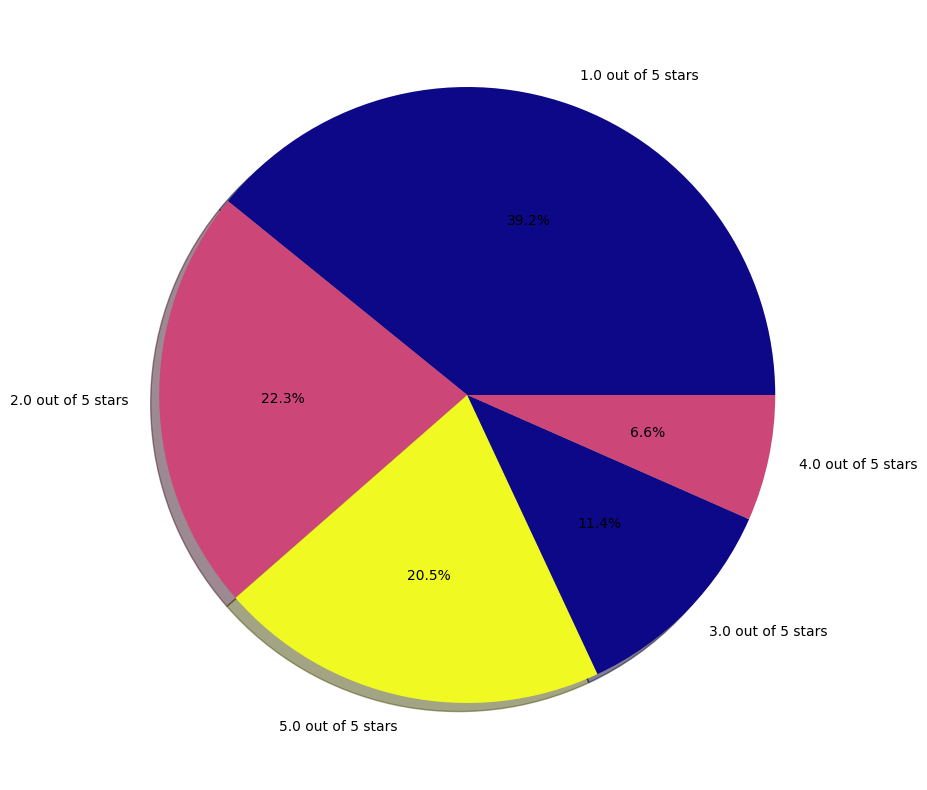

In [ ]:
counts = df['rating'].value_counts()
labels = df['rating'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

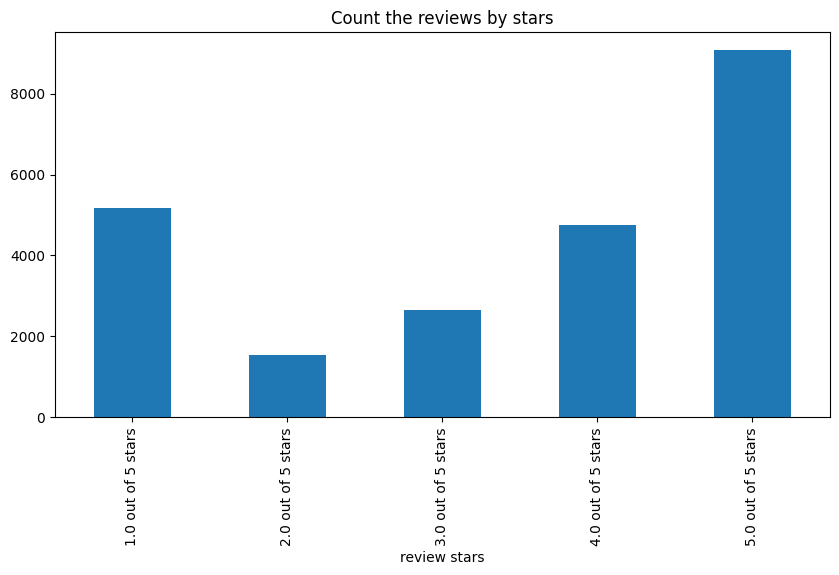

In [ ]:
ax = df['rating'].value_counts().sort_index().plot(kind = 'bar' , title = 'Count the reviews by stars', figsize = (10,5))
ax.set_xlabel('review stars')
plt.show()

In [ ]:
df['Review-Title']

0                         Worst phone ever
1                Ok !!! Not up to the mark
2                             Awesome look
3        One plus losing is originality!!!
4                                     Read
                       ...                
23772                Batten in this rangee
23773                          Good mobile
23774                          Good camera
23775                        Warest mobile
23776           Good phone complicated UI.
Name: Review-Title, Length: 23159, dtype: object

In [ ]:
import re

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Remove hashtags
    text = re.sub(r'#\S+', '', text)

    # Remove mentions
    text = re.sub(r'@\S+', '', text)

    # Remove special letters
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)

    # Remove extra spaces
    text = re.sub('\s+', ' ', text)

    return text

# Apply the function to the 'Review-Title', 'Review-Body', and 'Product Name' columns
df['Review-Title'] = df['Review-Title'].apply(clean_text)
df['Review-Body'] = df['Review-Body'].apply(clean_text)
df['Product Name'] = df['Product Name'].apply(clean_text)


<ipython-input-16-378487a85043>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review-Title'] = df['Review-Title'].apply(clean_text)
<ipython-input-16-378487a85043>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review-Body'] = df['Review-Body'].apply(clean_text)
<ipython-input-16-378487a85043>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
clean_text("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com") # to check wheather it is working or not.

'my webiste like is this and access it '

In [ ]:
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,worst phone ever,1.0 out of 5 stars,hang problem,oneplus nord ce 2 5g gray mirror 8gb ram 128gb...
1,1,ok not up to the mark,2.0 out of 5 stars,im writing this review after using 3days be to...,oneplus nord ce 2 5g gray mirror 8gb ram 128gb...
2,2,awesome look,5.0 out of 5 stars,camera is so good n very fast phone back look ...,oneplus nord ce 2 5g gray mirror 8gb ram 128gb...
3,3,one plus losing is originality,3.0 out of 5 stars,the media could not be loaded its a average pr...,oneplus nord ce 2 5g gray mirror 8gb ram 128gb...
4,4,read,1.0 out of 5 stars,i got my delivery on 23 feb when i unboxed the...,oneplus nord ce 2 5g gray mirror 8gb ram 128gb...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['rating'])
df['rating'] = le.transform(df['rating'])

<ipython-input-20-e62138c4549b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = le.transform(df['rating'])


In [ ]:
df.rating.unique()

array([0, 1, 4, 2, 3])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Vectorize the 'Review-Title', 'Review-Body', and 'Product Name' columns
df['Review-Title'] = vectorizer.fit_transform(df['Review-Title']).toarray()
df['Review-Body'] = vectorizer.fit_transform(df['Review-Body']).toarray()
df['Product Name'] = vectorizer.fit_transform(df['Product Name']).toarray()


<ipython-input-22-c29d67c86cd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review-Title'] = vectorizer.fit_transform(df['Review-Title']).toarray()
<ipython-input-22-c29d67c86cd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review-Body'] = vectorizer.fit_transform(df['Review-Body']).toarray()
<ipython-input-22-c29d67c86cd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform your data
X = cv.fit_transform(df)

# Define the path where you want to save the object
bow_path = 'path_to_your_file.pkl'

# Now you can save it
pickle.dump(cv, open(bow_path, "wb"))


In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming that 'rating' is your target variable
X = df.drop('rating', axis=1)
y = df['rating']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape


(18527, 4)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model')

['c2_Classifier_Sentiment_Model']

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[   0    0    0    0 1074]
 [   0    0    0    0  318]
 [   0    0    0    0  498]
 [   0    0    0    0  921]
 [   0    0    0    0 1821]]


0.39313471502590674